# Biggest Rectangle within a Circle

<div>
   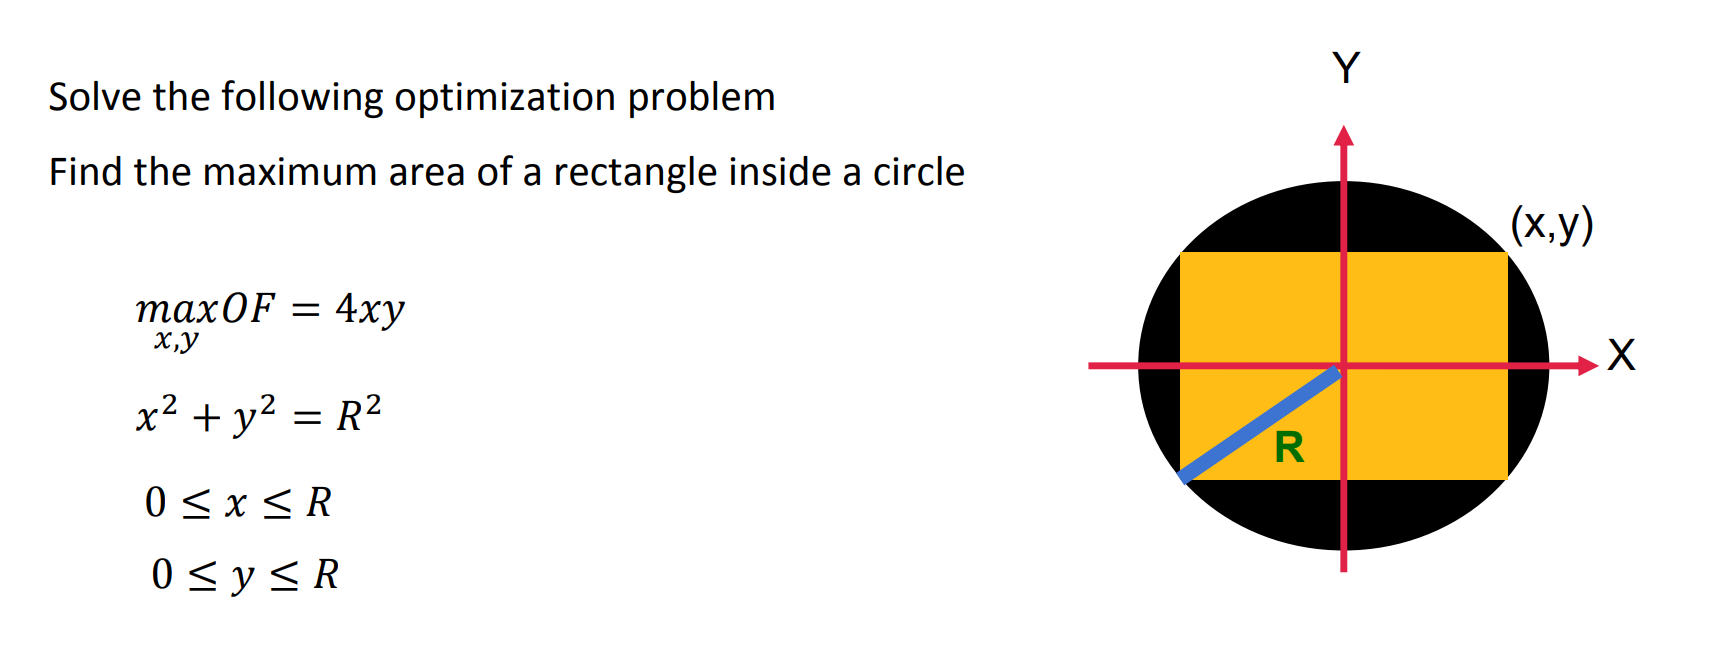
</div>

# Setup

In [1]:
import pyomo.environ as pyo

# Solution

## Model

<font color=gray size=2.5><b>lets define a concrete model</b></font>

In [2]:
model = pyo.ConcreteModel()

## Parameters

<font color=gray size=2.5><b>these are the known/given values in the problem statement</b></font>

the `R` (radius) of the circle is a parameter, assume that its given to be 10

In [3]:
model.R = pyo.Param(initialize=10)

## Variables

<font color=gray size=2.5><b>the unknowns - these are what the model needs to determine</b></font>

`x` and `y` are the variables that we need to find out.  

If the centre of the circle has the coordinates `(0, 0)`, then:
- the length of the rectangle will be `2x`
- the height of the rectangle will be `2y`
- and therefore, the area of the rectangle will be `4xy`

also, the values of `x` and `y` cant exceed the radius `R` of the circle

In [4]:
model.x = pyo.Var(bounds=(0, model.R), initialize=model.R)
model.y = pyo.Var(bounds=(0, model.R), initialize=model.R)

## Constraints

<font color=gray size=2.5><b>lets define the constraints</b></font>

in this problem statement, we have the following constraints:
 > $x^2 + y^2 = R^2$

In [5]:
model.c1 = pyo.Constraint(expr=model.x**2+model.y**2 == model.R**2)

## Objective Function

<font color=gray size=2.5><b>the objective function - we need to maximixe this function as per the current question</b></font>

the objective is to find the biggest possible area of a rectangle
> (max) $ 4*x*y $

In [6]:
model.objective = pyo.Objective(expr=4*model.x*model.y, sense=pyo.maximize)

# Solve

In [7]:
optimizer = pyo.SolverFactory('ipopt')
results = optimizer.solve(model)

In [8]:
print('x =', round(pyo.value(model.x), 3))
print('y =', round(pyo.value(model.y), 3))
print('Area =', round(pyo.value(model.objective), 3))

x = 7.071
y = 7.071
Area = 200.0


In [9]:
print(results)


Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 1
  Number of variables: 2
  Sense: unknown
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.04701876640319824
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



# Experimentations with the results

###### fixing one of the variables

In [10]:
model.x.fix(1)
results = optimizer.solve(model)

In [11]:
print('x = ', round(pyo.value(model.x), 3))
print('y = ', round(pyo.value(model.y), 3))
print('Area = ', round(pyo.value(model.objective), 3))

x =  1
y =  9.95
Area =  39.799


###### unfixing variables

In [12]:
model.x.unfix()
model.y.fix(1)
results = optimizer.solve(model)

In [13]:
print('x = ', round(pyo.value(model.x), 3))
print('y = ', round(pyo.value(model.y), 3))
print('Area = ', round(pyo.value(model.objective), 3))

x =  9.95
y =  1
Area =  39.799


In [14]:
model.x.unfix()
model.y.unfix()
results = optimizer.solve(model)

In [15]:
print('x = ', round(pyo.value(model.x), 3))
print('y = ', round(pyo.value(model.y), 3))
print('Area = ', round(pyo.value(model.objective), 3))

x =  7.071
y =  7.071
Area =  200.0
